<a href="https://colab.research.google.com/github/bala-codes/MALARIA-CELLS-PARASITE-CLASSIFIER-USING-DEEP-LEARNING/blob/master/codes%20(FASTAI)/4.%20Malaria%20Cell%20Classifier%20FASTAI%20(ENSEMBLE%203%20DL%20MODELS)%20Single%20Input%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%%time

# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
!pip install torch torchvision fastai

'''
fastai                   1.0.59     
torch                    1.3.1      
torchsummary             1.5.1      
torchtext                0.3.1      
torchvision              0.4.2  
'''

fastai                   1.0.60         
torch                    1.4.0          
torchsummary             1.5.1          
torchtext                0.3.1          
torchvision              0.5.0          
CPU times: user 171 ms, sys: 27.8 ms, total: 199 ms
Wall time: 13.5 s


In [ ]:
%%time
import matplotlib.pyplot as plt
from skimage.transform import resize
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import PIL
from PIL import Image

from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy


def img_show_resize(PATH):
  image = plt.imread(PATH)
  plt.imshow(image)
  img_resized = resize(image, (128, 128))

  assert img_resized.shape == (128, 128, 3)
  return img_resized

def resize_save(PATH):
  img = plt.imread(PATH)
  channel = img.shape[2]

  if channel != 3:
    img = plt.imread(PATH)[:,:,:3]
  else:
    img = plt.imread(PATH)
  
  img = resize(img, (128, 128))
  plt.imsave(PATH, img)
  assert img.shape == (128, 128, 3)
  return PATH


def plotter(prediction):
  prediction1 = prediction
  final = str(prediction1[0])
  scores = prediction1[2]
  a = float((scores[0]))
  b = float((scores[1]))

  start = "\033[1m"
  end = "\033[0;0m"
  print("OUTPUT - "+ start + str(final) + end)
  print()
  class_labels = ['INFECTED','UNINFECTED']
  j = [a,b]
  y_pos = np.arange(len(class_labels))
  colors = ['r', 'g']
  plt.barh(y_pos, j, color = colors, alpha=0.6)
  plt.xlim(0.1,1.0)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING AFFECTED BY MALARIA')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()

def finalplotter(prediction1,prediction2,prediction3):

  final = []

  pred1 = prediction1
  final1 = str(pred1[0])
  scores1 = pred1[2]
  a1 = float((scores1[0]))
  b1 = float((scores1[1]))
  final.append(final1)

  pred2 = prediction2
  final2 = str(pred2[0])
  scores2 = pred2[2]
  a2 = float((scores2[0]))
  b2 = float((scores2[1]))
  final.append(final2)

  pred3 = prediction3
  final3 = str(pred3[0])
  scores3 = pred3[2]
  a3 = float((scores3[0]))
  b3 = float((scores3[1]))
  final.append(final3)

  print(final)
  a = np.mean([a1,a2,a3], dtype=float)
  b = np.mean([b1,b2,b3], dtype=float)
  
  start = "\033[1m"
  end = "\033[0;0m"
  # print("OUTPUT - "+ start + str(final) + end)
  print()
  class_labels = ['INFECTED','UNINFECTED']
  j = [a,b]
  y_pos = np.arange(len(class_labels))
  colors = ['r', 'g']
  plt.barh(y_pos, j, color = colors, alpha=0.6)
  plt.xlim(0.1,1.0)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING AFFECTED BY MALARIA')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()

CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.29 ms


# IMPORT THE MODELS HERE

In [ ]:
%%time
path1 = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models/'
path2 = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models/models-VGG19/'

learner1 = load_learner(path1, 'stage-3-MALARIA-VGG16-epoch.pkl')
learner2 = load_learner(path2, 'stage-3-MALARIA-VGG19.pkl')
learner3 = load_learner(path2, 'stage-1-MALARIA-VGG19.pkl')

CPU times: user 64.4 ms, sys: 210 ms, total: 274 ms
Wall time: 2 s


In [ ]:
'''
img1 = img_show_resize('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
img2 = img_show_resize('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Uninfected/C1_thinF_IMG_20150604_104722_cell_81.png')
print(type(img1))
imsave("/content/img1resized.png", img1)
imsave("/content/img2resized.png", img2)
'''

'\nimg1 = img_show_resize(\'/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png\')\nimg2 = img_show_resize(\'/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Uninfected/C1_thinF_IMG_20150604_104722_cell_81.png\')\nprint(type(img1))\nimsave("/content/img1resized.png", img1)\nimsave("/content/img2resized.png", img2)\n'

In [ ]:
!cp -r '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png' '/content/C33P1thinF_IMG_20150619_114756a_cell_180.png' 

torch.Size([3, 128, 128])


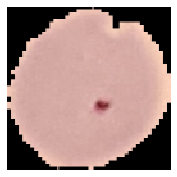

In [ ]:
testimg1 = open_image(resize_save('/content/C33P1thinF_IMG_20150619_114756a_cell_180.png'))
print(testimg1.shape)
testimg1.show()

OUTPUT - Parasitized



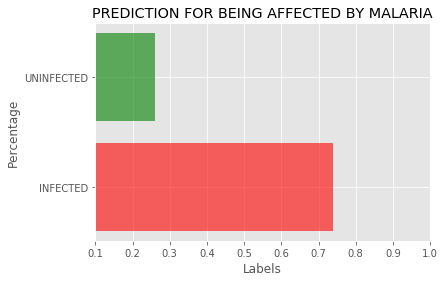

OUTPUT - Parasitized



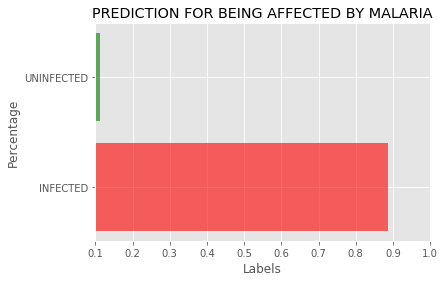

OUTPUT - Parasitized



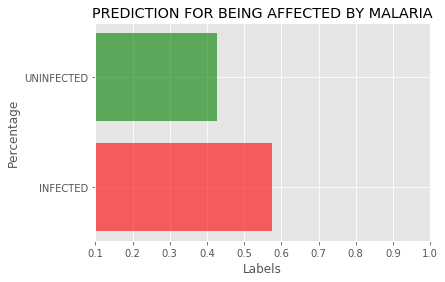

CPU times: user 1.09 s, sys: 8.89 ms, total: 1.1 s
Wall time: 1.1 s


In [ ]:
%%time

prediction1 = learner1.predict(testimg1)
prediction2 = learner2.predict(testimg1)
prediction3 = learner3.predict(testimg1)

plotter(prediction1)
plotter(prediction2)
plotter(prediction3)

['Parasitized', 'Parasitized', 'Parasitized']



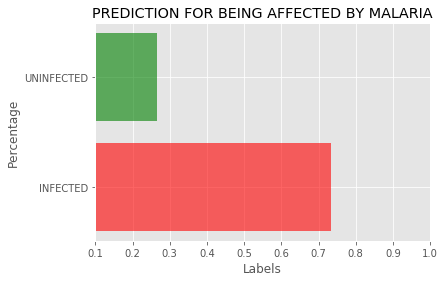

In [ ]:
finalplotter(prediction1,prediction2,prediction3)